<h2 style="color:blue" align="center">Handwritten digits classification using CNN</h2>

In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [1]:
# run 'pip install tensorflow' at anaconda prompt to install it for the first time
# to install tensorflow successfully you should have either one of the python or anaconda installtions, not both.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# loading the dataset
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape   # 60000 handwritten digit image samples with dimension 28x28

(60000, 28, 28)

In [4]:
X_test.shape    # 10000 handwritten digit image samples with dimension 28x28

(10000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

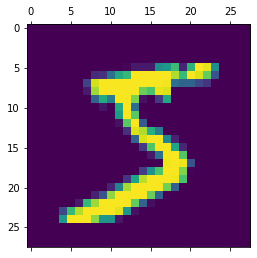

In [6]:
plt.matshow(X_train[0])    # displaying the image

In [7]:
y_train[0]

5

In [8]:
# normalizing the training and test data. Scaling will improve the efficiency of a model
# after scaling values will range from 0 to 1
X_train = X_train / 255
X_test = X_test / 255

<h3 style='color:purple'>Using ANN for classification</h3>

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',    # Computes the crossentropy loss between 
                                                         # the labels and predictions
              metrics=['accuracy'])                      # Calculates how often predictions equal labels

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2803 - accuracy: 0.9197
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1303 - accuracy: 0.9616
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0901 - accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0692 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0538 - accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0448 - accuracy: 0.9858
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0351 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0288 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0237 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.020

In [10]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9766


[0.08539824932813644, 0.9765999913215637]

In [11]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [12]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

<h3 style='color:purple'>Using CNN for classification</h3>

In [13]:
model = keras.Sequential([
    # CNN convolution and pooling layer
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    # dense network
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',    # Computes the crossentropy loss between 
                                                         # the labels and predictions
              metrics=['accuracy'])                      # Calculates how often predictions equal labels
 
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1533 - accuracy: 0.9541
Epoch 2/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0523 - accuracy: 0.9842
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0340 - accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0232 - accuracy: 0.9925
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0159 - accuracy: 0.9952


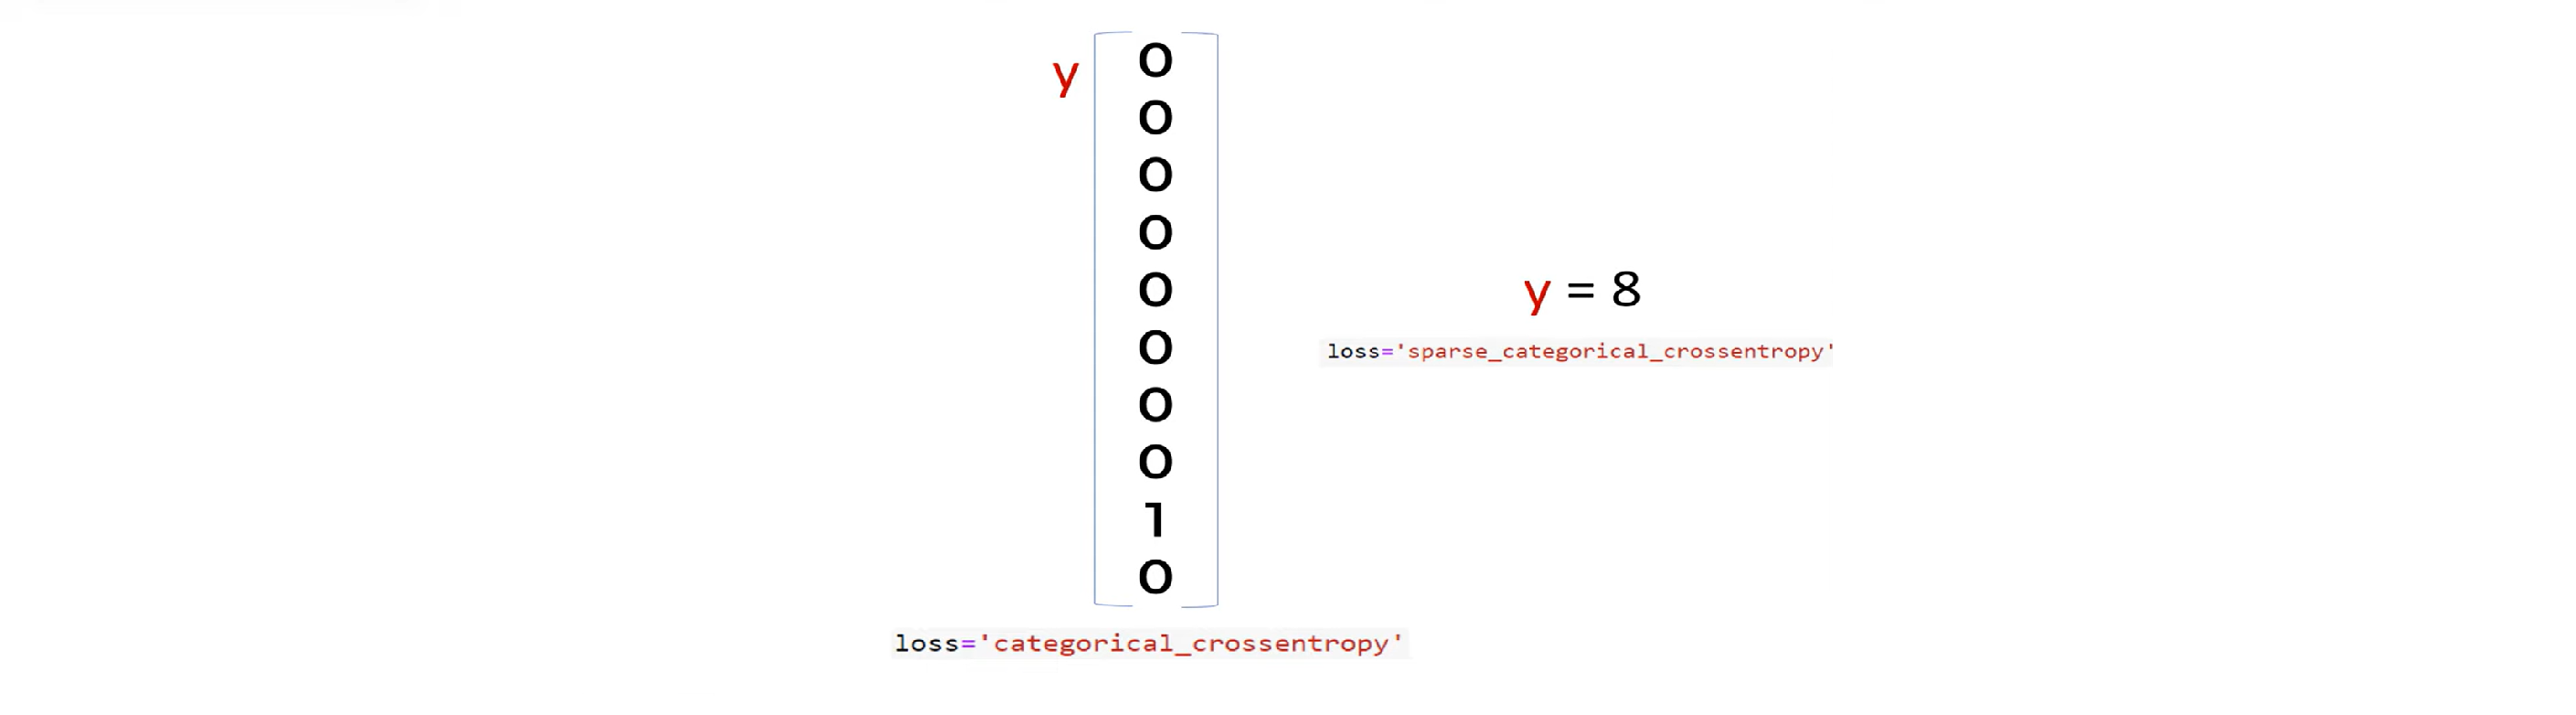

In [15]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [16]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0459 - accuracy: 0.9862


[0.0459456667304039, 0.9861999750137329]